## 1. Write a Python script to implement the Newtons method Example 2.2 (page 27).
### Example 2.2:
To find the value of x maximizing $g(x) = log x/(1+x)$, take $x^{(0)} = 3$.
At iteration <i>t</i>, the approach approximates
$$g'(x^*) ≈ g'(x^{(t)})+(x^*-x^{(t)})g''(x^{(t)})$$

$$x^{(t+1)} = x^{(t)} + h^{(t)}$$

$$h^{(t)} = -g'(x^{(t)})/g''(x^{(t)})$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Loading BokehJS ...

In [2]:
def gp(x):
    return (1+1/x-np.log(x))/(1+x)**2
def gpp(x):
    return -1/(x**2*(1 + x)) - 2/(x*(1 + x)**2) + (2*np.log(x))/(1 + x)**3
def Newton(gp,gpp,x0):
    x_t = x0
    xt = np.zeros(3) #Save first 3 guesses
    xt[0] = x_t
    x_t1 = x_t - gp(x_t)/gpp(x_t)
    i = 1
    while abs(x_t1-x_t)/abs(x_t1) >= 0.000001: #Eqn 2.7; epsilon = 0.000001 (0.0001%)
        x_t = x_t1
        if i < 3:
            xt[i] = x_t
        x_t1 = x_t - gp(x_t)/gpp(x_t)
        i += 1
    return xt, x_t, i
def LL(x_i, theta):
    n = x_i.size
    temp = np.zeros([n,theta.size])
    for i in range(n): # returns indexes of x_i
        temp [i,:] = np.log(1-np.cos(x_i[i]-theta)) 
    return np.transpose(np.array([temp]).sum(axis=1) - n*np.log(2*np.pi))
def LLp(x_i,theta):
    n = x_i.size
    temp = np.zeros([n,theta.size])
    for i in range(n): # returns indexes of x_i
        temp [i,:] = np.sin(x_i[i]-theta)/(1-np.cos(x_i[i]-theta)) 
    return np.transpose(np.array([temp]).sum(axis=1))
def LLpp(x_i,theta):
    n = x_i.size
    temp = np.zeros([n,theta.size])
    for i in range(n): # returns indexes of x_i
        temp [i,:] = 1/(1-np.cos(x_i[i]-theta)) 
    return np.transpose(np.array([temp]).sum(axis=1))
def Newton2(LLp, LLppp, x_i, theta0):
    theta_t = theta0
    theta_t1 = theta_t - LLp(x_i,theta_t)/LLpp(x_i,theta_t)
    i = 1
    while abs(theta_t1-theta_t)/abs(theta_t1) >= 0.000001: #Eqn 2.7; epsilon = 0.000001 (0.0001%)
        theta_t = theta_t1
        theta_t1 = theta_t - LLp(x_i,theta_t)/LLpp(x_i,theta_t)
        i += 1
    return theta_t, i

In [3]:
[xt,x_t,i] = Newton(gp,gpp,3.0)
print("Newton's Method Final Solution: ","%.4f"%x_t)
print("Number of iterations: ","%d"%i)

Newton's Method Final Solution:  3.5911
Number of iterations:  5


### Figure 2.3

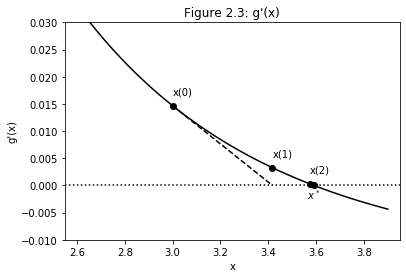

In [4]:
x = np.linspace(2.6,3.9)
x_star = 3.59112
plt.plot(x,gp(x),'k')
plt.title("Figure 2.3: g'(x)")
plt.xlabel('x')
plt.ylabel("g'(x)")
# Add markers for first 3 guesses
plt.plot([xt[0],xt[1],xt[2],x_star],[gp(xt[0]),gp(xt[1]),gp(xt[2]),gp(x_star)],'ko')
plt.text(xt[0], gp(xt[0])+0.002, 'x(0)')
plt.text(xt[1], gp(xt[1])+0.002, 'x(1)')
plt.text(xt[2], gp(xt[2])+0.002, 'x(2)')
plt.text(x_star-0.03, gp(x_star)-0.0025, r'$x^*$')
# Add tangent line at x(0)
plt.plot([xt[0],xt[1]],[gp(xt[0]),0],'k--')
# Add horizontal zero line
plt.hlines(0,2.5,4.0,colors='k', linestyles='dotted')
plt.axis([2.55, 3.95, -0.01, 0.03])
plt.show()

## 2. PROBLEM 2.2 (pg 54)
Consider the density $f(x) = [1 − cos{x − θ}]/2π$ on $0 ≤ x ≤ 2π$, where $θ$ is a parameter
between $−π$ and $π$. The following i.i.d. data arise from this density: 3.91, 4.85,
2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99,
2.54, 0.52, 2.50. We wish to estimate $θ$.

### a. Graph the log likelihood function between $−π$ and $π$.

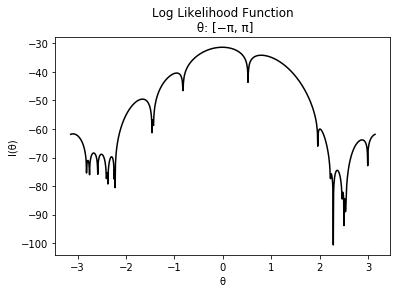

In [5]:
# Data from problem
x_i = np.array([3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96,
                2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50])
theta = np.linspace(-np.pi,np.pi,1000) # Number of divisions chosen to get a smooth curve
plt.plot(theta, LL(x_i,theta),'k')   
plt.xlabel('θ')
plt.ylabel('l(θ)')
plt.title('Log Likelihood Function\n θ: [−π, π]')
plt.show()


### b. Find the method-of-moments estimator of θ.

$µ(θ) = \int (x f(x)) dx = \bar{X}$

$µ(θ) = \int (x (1-cos(X_i - θ)/2π dx  = sin(θ) + π = \bar{X}$

$\tilde{θ} = arcsin(\bar{X} - π)$

In [6]:
X_bar = np.mean(x_i)
MME_theta = np.arcsin(X_bar - np.pi)
print("Method-of-moments estimator: ","%.5f"%MME_theta)

Method-of-moments estimator:  0.05844


### c. Find the MLE for θ using the Newton–Raphson method, using the result from (b) as the starting value. What solutions do you find when you start at −2.7 and 2.7?

$$θ^{t+1} = θ^t - l'(θ^t)/l''(θ^t)$$

$$l'(θ^t) = \sum_{i=0}^n \frac{sin(X_i - θ)}{1-cos(X_i - θ)}$$

$$l''(θ^t) = \sum_{i=0}^n \frac{1}{1-cos(X_i - θ)}$$

In [7]:
# Newton-Raphson method with Method-of-moments estimator for starting point
[theta_t,i] = Newton2(LLp, LLpp, x_i, MME_theta)
print("Starting value: ","%.5f"%MME_theta)
print("Newton's Method Final Solution: ","%.4f"%theta_t)
print("Number of iterations: ","%d"%i,"\n")

# Newton-Raphson method with 2.7 for starting point
theta_0 = np.float64(2.7)
[theta_t,i] = Newton2(LLp, LLpp, x_i, theta_0)
print("Starting value: ","%.1f"%2.7)
print("Newton's Method Final Solution: ","%.4f"%theta_t)
print("Number of iterations: ","%d"%i,"\n")

# Newton-Raphson method with -2.7 for starting point
theta_0 = np.float64(-2.7)
[theta_t,i] = Newton2(LLp, LLpp, x_i, theta_0)
print("Starting value: ","%.1f"%theta_0)
print("Newton's Method Final Solution: ","%.4f"%theta_t)
print("Number of iterations: ","%d"%i)

Starting value:  0.05844
Newton's Method Final Solution:  -0.0120
Number of iterations:  4 

Starting value:  2.7
Newton's Method Final Solution:  2.8731
Number of iterations:  5 

Starting value:  -2.7
Newton's Method Final Solution:  -2.6667
Number of iterations:  4


### d. Repeat part (c) using 200 equally spaced starting values between−π and π. Partition the interval between −π and π into sets of attraction. In other words, divide the set of starting values into separate groups, with each group corresponding to a separate unique outcome of the optimization (a local mode). Discuss your results.

In [8]:
numdiv = 200
theta_attraction = np.linspace(-np.pi,np.pi,numdiv)
NR_estimate = np.zeros([numdiv,3]) # 200 starting values; store starting value, Newton-Raphson estimate, and iterations
for theta in range(numdiv):
    NR_estimate [theta,0] = theta_attraction[theta]
    [theta_t,i] = Newton2(LLp, LLpp, x_i, theta_attraction[theta])
    NR_estimate [theta,1] = theta_t
    NR_estimate [theta,2] = i
print("Newton-Raphson Estimates:")
print(NR_estimate[:,0:2])

Newton-Raphson Estimates:
[[-3.14159265 -3.09309173]
 [-3.11001886 -3.09309181]
 [-3.07844506 -3.09309174]
 [-3.04687127 -3.09309203]
 [-3.01529747 -3.09309173]
 [-2.98372368 -3.09309174]
 [-2.95214988 -3.09309178]
 [-2.92057608 -3.09309173]
 [-2.88900229 -3.09309174]
 [-2.85742849 -3.09309173]
 [-2.8258547  -3.09309187]
 [-2.7942809  -2.78616676]
 [-2.76270711 -2.78616675]
 [-2.73113331 -2.66670015]
 [-2.69955952 -2.66669993]
 [-2.66798572 -2.66670055]
 [-2.63641193 -2.66669993]
 [-2.60483813 -2.66669988]
 [-2.57326433 -2.50761323]
 [-2.54169054 -2.50761427]
 [-2.51011674 -2.50761323]
 [-2.47854295 -2.50761323]
 [-2.44696915 -2.50761323]
 [-2.41539536 -2.50761326]
 [-2.38382156 -2.38820049]
 [-2.35224777 -2.29725601]
 [-2.32067397 -2.29725622]
 [-2.28910017 -2.29725622]
 [-2.25752638 -2.29725622]
 [-2.22595258 -2.23216664]
 [-2.19437879 -1.65828323]
 [-2.16280499 -1.65828259]
 [-2.1312312  -1.65828323]
 [-2.0996574  -1.65828323]
 [-2.06808361 -1.65828323]
 [-2.03650981 -1.65828323]
 [

In [9]:
# Find sets of attraction by diving results of Newton-Raphson based on differences greater than tolerance of 1x10^-4
tol = 1*10**-4
# Manual identification
breaks = np.zeros([numdiv-1,2]) #Breaks/divisions between sets of attraction; maximum of one less division than theta guesses
for value in range(numdiv):
    if value == numdiv - 1:
        break
    if abs(NR_estimate[value,1]-NR_estimate[value-1,1])<tol:
        continue
    else:
        breaks[value,0] = value #Which entry this break occurs; will be start point for next set
        breaks[value,1] = NR_estimate[value,1]
print("Indices where the NR estimate changes to a different value:")
print(breaks)

Indices where the NR estimate changes to a different value:
[[ 0.00000000e+00 -3.09309173e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.10000000e+01 -2.78616676e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.30000000e+01 -2.66670015e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.80000000e+01 -2.50761323e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.40000000e+01 -2.38820049e+00]
 [ 2.50000000e+01 -2.29725601e+00]
 [ 0.00000000e+00  0.00000000e

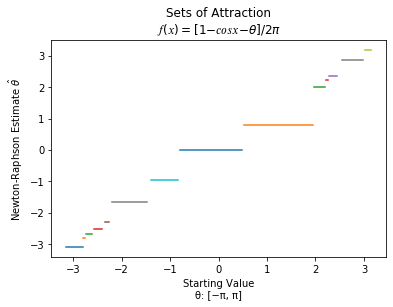

In [10]:
numsets = np.count_nonzero(breaks[:,0])
lower = [NR_estimate[0,0],NR_estimate[11,0],NR_estimate[13,0],NR_estimate[18,0],NR_estimate[24,0],
         NR_estimate[25,0],NR_estimate[29,0],NR_estimate[30,0],NR_estimate[54,0],NR_estimate[55,0],
         NR_estimate[74,0],NR_estimate[116,0],NR_estimate[162,0],NR_estimate[170,0],NR_estimate[172,0],
         NR_estimate[178,0],NR_estimate[179,0],NR_estimate[180,0],NR_estimate[195,0]]
upper = [NR_estimate[11,0],NR_estimate[12,0],NR_estimate[17,0],NR_estimate[23,0],
         NR_estimate[24,0],NR_estimate[28,0],NR_estimate[29,0],NR_estimate[53,0],NR_estimate[54,0],
         NR_estimate[73,0],NR_estimate[115,0],NR_estimate[161,0],NR_estimate[169,0],NR_estimate[171,0],
         NR_estimate[177,0],NR_estimate[178,0],NR_estimate[179,0],NR_estimate[194,0],NR_estimate[199,0]]
start_value = [-3.0931, -2.7862, -2.6667, -2.5076, -2.3882, -2.2973, -2.2322, -1.6583, -1.4475,
               -0.9533, -0.0120, 0.7906, 2.0036, 2.2362, 2.3607, 2.4754, 2.5136, 2.8731, 3.1901]
for i in range(len(lower)):
    plt.plot([lower[i],upper[i]],[start_value[i],start_value[i]])
plt.ylabel('Newton-Raphson Estimate $\hat{θ}$')
plt.xlabel('Starting Value\nθ: [−π, π]')
plt.title('Sets of Attraction\n$𝑓(𝑥)=[1−𝑐𝑜𝑠𝑥−θ]/2π$')
plt.show()

19 sets of attraction, or sepatate unique outcomes of the optimization, were found with a 1e-4 tolerance on the Newton-Raphson estimate, 5 of which were composed of a single start value. This figure shows the ranges of input values for which the Newton-Raphson method will converge to a particular value. Some ranges, or sets, are long (e.g. the algortithm will converge to $\hat{\theta} = 0.790601$ for $0.520968<\theta<1.94179$). Additionally, there are some large jumps in predicted estimate that the algorithm will converge to for small changes in starting value. For example, the algortithm will converge to $\hat{\theta} = 2.00364$ for $1.97336<\theta<2.19438$, bounds on set upper and lower limits from discretization of starting range on $\theta$.

### e. Find two starting values, as nearly equal as you can, for which the Newton–Raphson method converges to two different solutions.

Looking at the large jump seen in the figure and mentioned above in d., area of interest that will give rise to two starting values very close to each other but for which the Newton-Raphson method converges to two different solutions.

In [11]:
# Upper bound of set that gives rise to 𝜃̂ =0.79060, lower bound on where the start values divide to each prediction
low = 1.9418
# Lower bound of set that gives rise to 𝜃̂ =2.0036, upper bound on where the start values divide to each prediction
high = 1.9734

guess = np.float64((high + low)/2) # Midpoint for starting point
# Round to one less order of magnitude than tolerance, 3 digits
guess = round(guess,3)
# NR estimate for this midpoint guess
[theta_t, i] = Newton2(LLp, LLpp, x_i, np.float64(guess))
# Perturb by tolerance value
guess2 = guess + tol
# NR estimate
[theta_t2, i] = Newton2(LLp, LLpp, x_i, np.float64(guess2))
# Find the difference between these estimates, if within tolerance, still in lower
while abs(theta_t2 - theta_t) < tol:
    guess2 += 1e-4 #Pertub to cusp
    [theta_t2, i] = Newton2(LLp, LLpp, x_i, np.float64(guess2))
# Actual starting low value will be just below this value. guess2 ~ inflexion value
start_low = guess2 - tol
[theta_low, i] = Newton2(LLp, LLpp, x_i, np.float64(start_low))
print("Lower Starting Value: ","%.4f"%start_low)
print("NR Estimate for this Value: ","%.5f"%theta_low)
start_high = guess2 + tol #guess2 ~ inflexion point
[theta_high, i] = Newton2(LLp, LLpp, x_i, np.float64(start_high))
print("Lower Starting Value: ","%.4f"%start_high)
print("NR Estimate for this Value: ","%.5f"%theta_high)

Lower Starting Value:  1.9599
NR Estimate for this Value:  0.79060
Lower Starting Value:  1.9601
NR Estimate for this Value:  2.00364


C:\Users\aholc\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\aholc\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\aholc\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aholc\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal


This process was able to find the starting value for $\theta$ where the function has an inflexion point. Below this value [1.960], for a starting value of $\theta = 1.9599$, the Newton-Raphson Method will converge to $\hat{\theta}=0.79060$. Above this value, for a starting value of $\theta = 1.9601$, the algorithm will converge to $\hat{\theta}=2.00364$. This demonstrates the sensitivity of the Newton-Raphson method to the choice of starting value. 